In [19]:
import seaborn
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [20]:
partition_shapes = [[1000,1000], [2000,500],[4000,250], [5000,200], [8000,125], [10000,100], [20000, 50], [40000, 25],[50000, 20], [100000, 10], [200000, 5], [1000000, 1]]

In [35]:
data = open('results.disk')
lines = data.readlines()
rows = []
for line in lines:
    line = line.split(',')
    line = list(map(int,list(map(float, line))))
    rows.append(line)
    

row_row = []
row_col = []
col_row = []
col_col = []


for row in rows[:-1]:
    row_row.append(row[0])
    row_col.append(row[1])
    col_row.append(row[2])
    col_col.append(row[3])

row_row

[26379, 17997, 11316, 10606, 10722, 12714, 9960, 5046, 3956, 1828, 814]

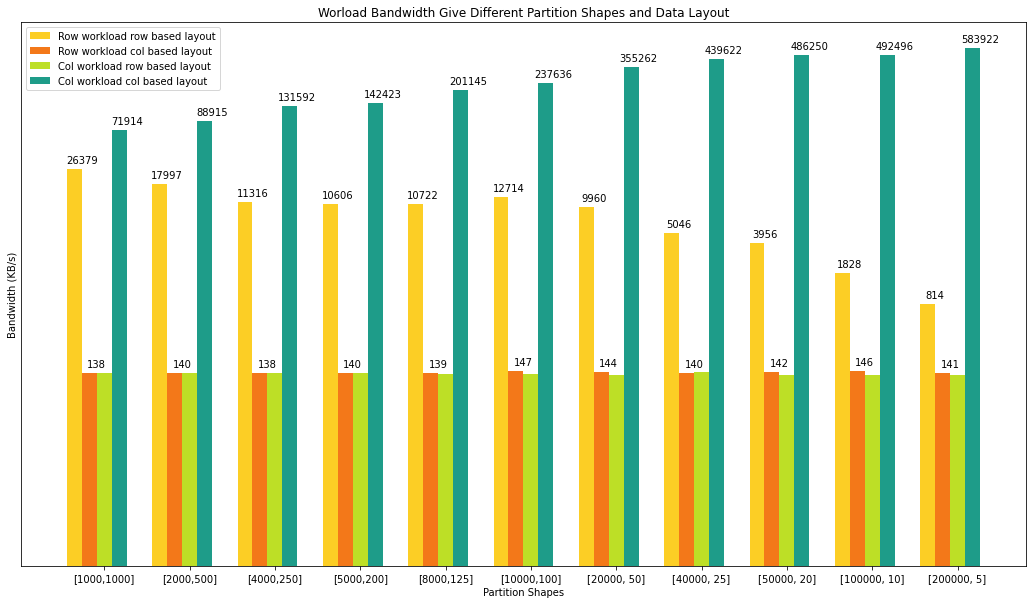

In [39]:
color4 = plt.cm.viridis(0.55)
color2 = plt.cm.inferno(0.7)
color3 = plt.cm.viridis(0.9)
color1 = plt.cm.plasma(0.9)

partition_shapes = ['[1000,1000]', '[2000,500]' ,'[4000,250]', '[5000,200]', 
                    '[8000,125]', '[10000,100]', '[20000, 50]', '[40000, 25]',
                    '[50000, 20]', '[100000, 10]', '[200000, 5]']


x = np.arange(len(partition_shapes))
width = 0.7 

fig, ax = plt.subplots(figsize=(18,10))

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Bandwidth (KB/s)')
ax.set_xlabel('Partition Shapes')
ax.set_xticks(x)
ax.set_xticklabels(partition_shapes)
ax.set_yticks([])
ax.set_title('Worload Bandwidth Given Different Partition Shapes and Data Layout')

rects1 = ax.bar(x - width/2, np.log1p(row_row), width/4, color=color1, label='Row workload row based layout')
rects2 = ax.bar(x - width/4, np.log1p(row_col), width/4, color=color2, label='Row workload col based layout')
rects3 = ax.bar(x,           np.log1p(col_row), width/4, color=color3, label='Col workload row based layout')
rects4 = ax.bar(x + width/4, np.log1p(col_col), width/4, color=color4, label='Col workload col based layout')
ax.legend() 

def autolabel(rects, height_list):
    """Attach a text label above each bar in *rects*, displaying its height."""
    
    i = 0
    for rect in rects:
        height = height_list[i]
        i = i+1
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width(), rect.get_height()),
                    xytext=(0, 4),
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1, row_row)
autolabel(rects2, row_col)
# autolabel(rects3, col_row)
autolabel(rects4, col_col)
plt.show()

In [11]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

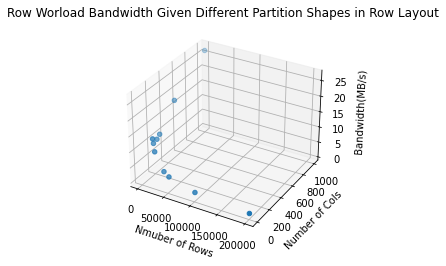

In [45]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title('Row Worload Bandwidth Given Different Partition Shapes in Row Layout')

x = [1000, 2000, 4000, 5000, 8000, 10000, 20000,40000, 50000, 100000, 200000]
y = [1000, 500, 250, 200, 125, 100, 50, 25, 20 , 10, 5]
z = list(map(lambda x: x/1000,row_row))
ax.set_xlabel('Nmuber of Rows')
ax.set_ylabel('Number of Cols')
ax.set_zlabel('Bandwidth(MB/s)')
ax.scatter(x, y, z, 'gray')

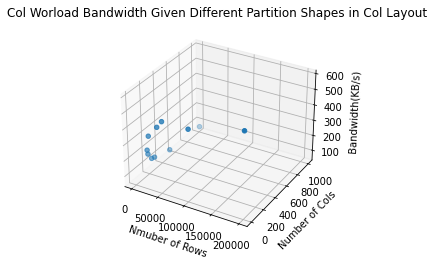

In [46]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title('Col Worload Bandwidth Given Different Partition Shapes in Col Layout')

x = [1000, 2000, 4000, 5000, 8000, 10000, 20000,40000, 50000, 100000, 200000]
y = [1000, 500, 250, 200, 125, 100, 50, 25, 20 , 10, 5]
z = list(map(lambda x: x/1000,col_col))
ax.set_xlabel('Nmuber of Rows')
ax.set_ylabel('Number of Cols')
ax.set_zlabel('Bandwidth(KB/s)')
ax.scatter(x, y, z, 'gray')

In [51]:
# Extreme cases
print('Row Partitions(1000, 1000), Row Workload:' + str(row_row[0]/1000) + 'MB/s')
print('Row Partitions(1000, 1000), Col Workload:' + str(col_row[0]) + 'KB/s')
print('Col Partitions(1000000, 1), Row Workload:' + str(rows[-1][-3]) + 'KB/s')
print('Col Partitions(1000000, 1), Col Workload:' + str(rows[-1][-1]/1000) + 'MB/s')

Row Partitions(1000, 1000), Row Workload:26.379MB/s
Row Partitions(1000, 1000), Col Workload:138KB/s
Col Partitions(1000000, 1), Row Workload:142KB/s
Col Partitions(1000000, 1), Col Workload:844.983MB/s
